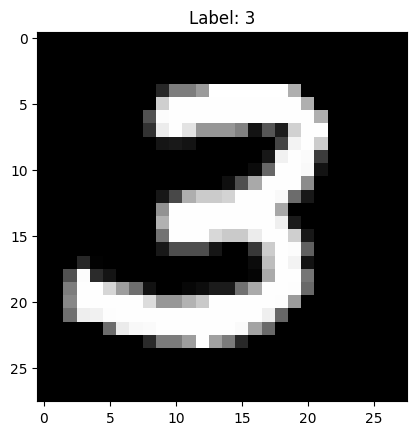

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 450s 235ms/step - accuracy: 0.8575 - loss: 0.4823 - val_accuracy: 0.9895 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 437s 232ms/step - accuracy: 0.9770 - loss: 0.0748 - val_accuracy: 0.9902 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 440s 231ms/step - accuracy: 0.9830 - loss: 0.0563 - val_accuracy: 0.9902 - val_loss: 0.0275 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 442s 231ms/step - accuracy: 0.9842 - loss: 0.0516 - val_accuracy: 0.9921 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 438s 234ms/step - accuracy: 0.9861 - loss: 0.0470 - val_accuracy: 0.9932 - val_loss: 0.0210 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 439s 232ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9928 - val_loss: 0.0225 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 431s 230ms

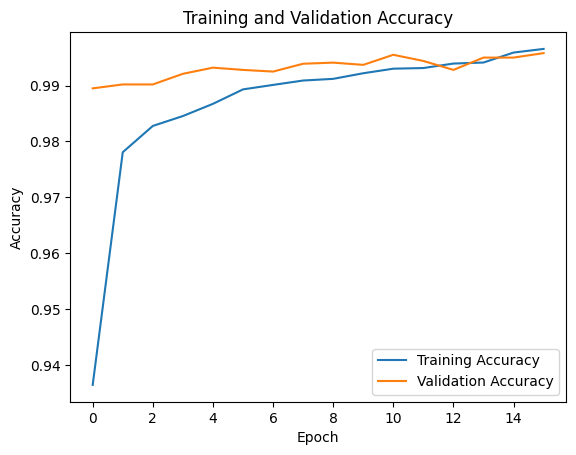

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

random_index = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[random_index].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[random_index]}")
plt.show()

def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
